In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from IPython.display import display, Math
from scipy.constants import c, pi

from tqdm.notebook import tqdm  # Needs installation of jupyter and ipywidgets packages

import sys
sys.path.append('../')

try:
    import imp
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py')
except:
    print('imp module not found. Trying with importlib...')
    from importlib.machinery import SourceFileLoader
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py').load_module()
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py').load_module()

plt.rcParams["figure.figsize"] = (8,6) 
plt.rc('font', size=12)

imp module not found. Trying with importlib...


C:\Program Files\Lumerical\v202\api\python\lumapi.py:797: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
inter = lumapi.INTERCONNECT(filename='EBeam_amantejr_thermo_MZI1.icp')

C:\Program Files\Lumerical\v202\api\python\lumapi.py:797: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


KeyboardInterrupt: 

In [6]:
matA0B0 = scipy.io.loadmat('MatFiles/amantejr_0-4A_0VB_0V.mat')
matA0B0

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed May 31 14:01:28 2023',
 '__version__': '1.0',
 '__globals__': [],
 'scandata': array([[(array([[1480.  , 1480.01, 1480.02, ..., 1579.98, 1579.99, 1580.  ]]), array([[ -32.15240415,  -73.6862089 ,  -37.60480668, -100.        ],
                [ -31.97247641,  -69.77098373,  -37.95571366, -100.        ],
                [ -31.77231348,  -69.18103495,  -38.35105796, -100.        ],
                ...,
                [-100.        , -100.        , -100.        , -100.        ],
                [-100.        , -100.        , -100.        , -100.        ],
                [-100.        , -100.        , -100.        , -100.        ]]))                                                                     ]],
       dtype=[('Wavelength (nm)', 'O'), ('Power (dBm)', 'O')]),
 'metadata': array([[(array(['amantejr_thermo_MZI1'], dtype='<U20'), array(['482'], dtype='<U3'), array(['5077'], dtype='<U4'), array([[3899.55139]]), array(

In [7]:
matA0B0.keys()

dict_keys(['__header__', '__version__', '__globals__', 'scandata', 'metadata'])

# Gain x Wavelength (Published vs INTERCONNECT)

Text(0, 0.5, 'Power (dBm)')

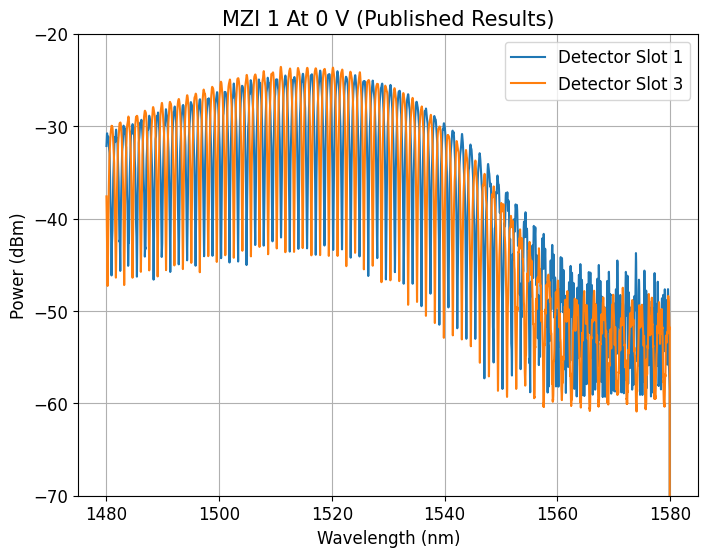

In [88]:
WvArray = matA0B0['scandata'][0][0][0][0]
curve1 = matA0B0['scandata'][0][0][1][:,0]
curve2 = matA0B0['scandata'][0][0][1][:,1]
curve3 = matA0B0['scandata'][0][0][1][:,2]
curve4 = matA0B0['scandata'][0][0][1][:,3]

plt.figure(figsize=(8,6))
plt.plot(WvArray,curve1,label='Detector Slot 1')
# plt.plot(WvArray,curve2,label='Detector Slot 2')
plt.plot(WvArray,curve3,label='Detector Slot 3')
# plt.plot(WvArray,curve4,label='Detector Slot 4')
plt.grid()
plt.legend()
plt.ylim(-70,-20)
plt.title('MZI 1 At 0 V (Published Results)',fontsize=15)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Power (dBm)',fontsize=12)

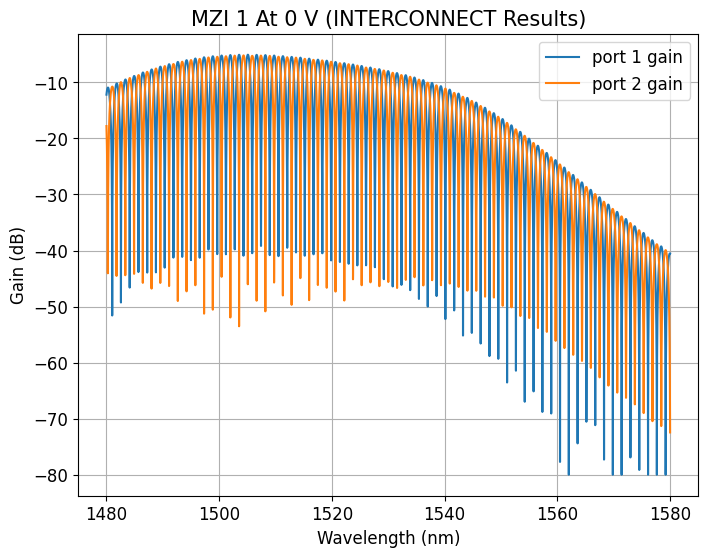

In [94]:
inter.switchtolayout()

WvLenRange = [1480e-9,1580e-9]
ONAPoints = 10001
WvlenArray = np.linspace(WvLenRange[0],WvLenRange[1],ONAPoints)

inter.setnamed('DC_1','amplitude',0)

inter.setnamed('ONA_1','input parameter','start and stop')
inter.setnamed('ONA_1','start frequency',c/WvLenRange[1])
inter.setnamed('ONA_1','stop frequency',c/WvLenRange[0])
inter.setnamed('ONA_1','number of points',ONAPoints)

Port1Gain = np.zeros(ONAPoints)
Port2Gain = np.zeros(ONAPoints)

inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)']
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)']

plt.figure(figsize=(8,6))
plt.plot(WvlenArray*1e9,Port1Gain,label='port 1 gain')
plt.plot(WvlenArray*1e9,Port2Gain,label='port 2 gain')
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('MZI 1 At 0 V (INTERCONNECT Results)',fontsize=15)
# plt.ylim(-70,-20)
plt.legend()
plt.grid()

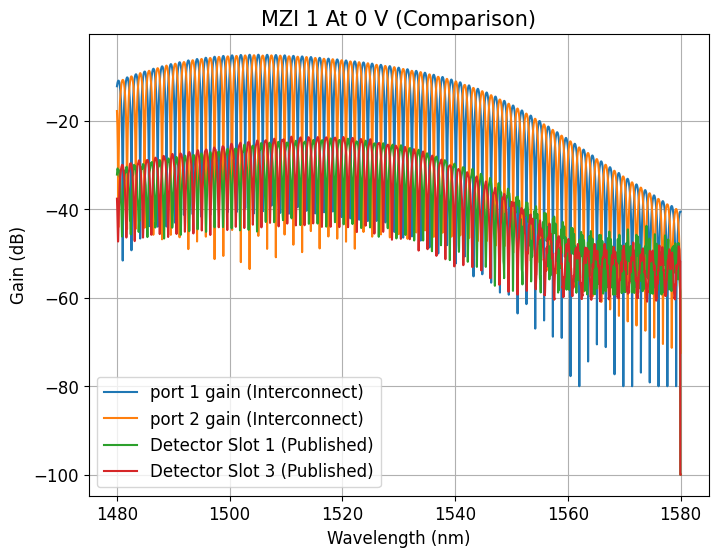

In [95]:
plt.figure(figsize=(8,6))
plt.plot(WvlenArray*1e9,Port1Gain,label='port 1 gain (Interconnect)')
plt.plot(WvlenArray*1e9,Port2Gain,label='port 2 gain (Interconnect)')
plt.plot(WvArray,curve1,label='Detector Slot 1 (Published)')
plt.plot(WvArray,curve3,label='Detector Slot 3 (Published)')
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('MZI 1 At 0 V (Comparison)',fontsize=15)
plt.legend()
plt.grid()

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI 1 At 0V Comparison" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

# Gain x Voltage (Published vs INTERCONNECT)

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(WvlenArray*1e9,Port1Gain,label='port 1 gain (Interconnect)')
plt.plot(WvlenArray*1e9,Port2Gain,label='port 2 gain (Interconnect)')
plt.plot(WvArray,curve1,label='Detector Slot 1 (Published)')
plt.plot(WvArray,curve3,label='Detector Slot 3 (Published)')
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('MZI 1 At 0 V (Comparison)',fontsize=15)
plt.legend()
plt.grid()

In [77]:
matA0B0 = scipy.io.loadmat('MatFiles/amantejr_0-4A_0VB_0V.mat')
matA1B1 = scipy.io.loadmat('MatFiles/amantejr_0-4A_ 1VB_ 1V.mat')
matA2B2 = scipy.io.loadmat('MatFiles/amantejr_0-4A_ 2VB_ 2V.mat')
matA3B3 = scipy.io.loadmat('MatFiles/amantejr_0-4A_ 3VB_ 3V.mat')
matA4B4 = scipy.io.loadmat('MatFiles/amantejr_0-4A_ 4VB_ 4V.mat')

PubArray = np.zeros((5,2))

PubArray[0,0] = matA0B0['scandata'][0][0][1][:,0][7001]
PubArray[0,1] = matA0B0['scandata'][0][0][1][:,2][7001]
PubArray[1,0] = matA1B1['scandata'][0][0][1][:,0][7001]
PubArray[1,1] = matA1B1['scandata'][0][0][1][:,2][7001]
PubArray[2,0] = matA2B2['scandata'][0][0][1][:,0][7001]
PubArray[2,1] = matA2B2['scandata'][0][0][1][:,2][7001]
PubArray[3,0] = matA3B3['scandata'][0][0][1][:,0][7001]
PubArray[3,1] = matA3B3['scandata'][0][0][1][:,2][7001]
PubArray[4,0] = matA4B4['scandata'][0][0][1][:,0][7001]
PubArray[4,1] = matA4B4['scandata'][0][0][1][:,2][7001]

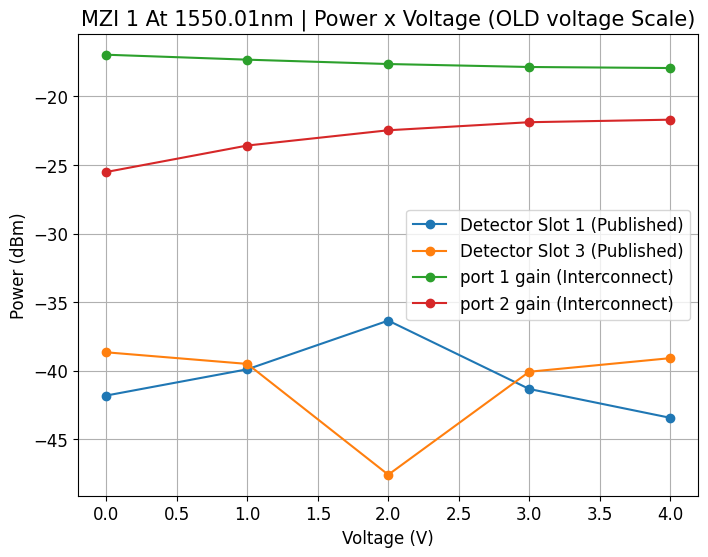

In [98]:
inter.switchtolayout()

WvLenRange = [1480e-9,1580e-9]
ONAPoints = 10001
WvlenArray = np.linspace(WvLenRange[0],WvLenRange[1],ONAPoints)

VoltArray = [0,1,2,3,4]
VoltArrayLarge = [0,1,2,3,4]

inter.setnamed('ONA_1','input parameter','start and stop')
inter.setnamed('ONA_1','start frequency',c/WvLenRange[1])
inter.setnamed('ONA_1','stop frequency',c/WvLenRange[0])
inter.setnamed('ONA_1','number of points',ONAPoints)

Port1Gain = np.zeros(len(VoltArray))
Port2Gain = np.zeros(len(VoltArray))

for i in range(len(VoltArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',VoltArray[i]/6.817)
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][7001]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][7001]

plt.figure(figsize=(8,6))
plt.plot(VoltArray,PubArray[:,0],'-o',label='Detector Slot 1 (Published)')
plt.plot(VoltArray,PubArray[:,1],'-o',label='Detector Slot 3 (Published)')
plt.plot(VoltArray,Port1Gain,'-o',label='port 1 gain (Interconnect)')
plt.plot(VoltArray,Port2Gain,'-o',label='port 2 gain (Interconnect)')
plt.grid()
plt.legend()
plt.title('MZI 1 At 1550.01nm | Power x Voltage (OLD voltage Scale)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=12)
plt.ylabel('Power (dBm)',fontsize=12)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI 1 At 1550nm Comparison" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

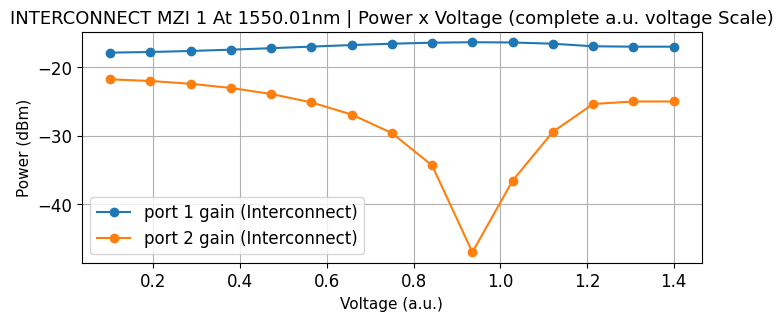

In [105]:
inter.switchtolayout()

WvLenRange = [1480e-9,1580e-9]
ONAPoints = 10001
WvlenArray = np.linspace(WvLenRange[0],WvLenRange[1],ONAPoints)

VoltArray = np.linspace(0.1,1.4,15)

inter.setnamed('ONA_1','input parameter','start and stop')
inter.setnamed('ONA_1','start frequency',c/WvLenRange[1])
inter.setnamed('ONA_1','stop frequency',c/WvLenRange[0])
inter.setnamed('ONA_1','number of points',ONAPoints)

Port1Gain = np.zeros(len(VoltArray))
Port2Gain = np.zeros(len(VoltArray))

inter.setnamed('DC_2','amplitude',0)

for i in range(len(VoltArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',VoltArray[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][7001]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][7001]

plt.figure(figsize=(8,3))
plt.plot(VoltArray,Port1Gain,'-o',label='port 1 gain (Interconnect)')
plt.plot(VoltArray,Port2Gain,'-o',label='port 2 gain (Interconnect)')
plt.grid()
plt.legend()
plt.title('INTERCONNECT MZI 1 At 1550.01nm | Power x Voltage (complete a.u. voltage Scale)',fontsize=13)
plt.xlabel('Voltage (a.u.)',fontsize=11)
plt.ylabel('Power (dBm)',fontsize=11)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI 1 At 1550nm Interconnect" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

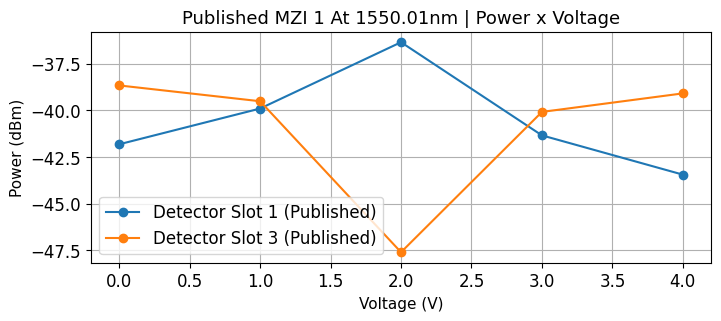

In [103]:
inter.switchtolayout()

WvLenRange = [1480e-9,1580e-9]
ONAPoints = 10001
WvlenArray = np.linspace(WvLenRange[0],WvLenRange[1],ONAPoints)

VoltArray = [0,1,2,3,4]

plt.figure(figsize=(8,3))
plt.plot(VoltArray,PubArray[:,0],'-o',label='Detector Slot 1 (Published)')
plt.plot(VoltArray,PubArray[:,1],'-o',label='Detector Slot 3 (Published)')
plt.grid()
plt.legend()
plt.title('Published MZI 1 At 1550.01nm | Power x Voltage',fontsize=13)
plt.xlabel('Voltage (V)',fontsize=11)
plt.ylabel('Power (dBm)',fontsize=11)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI 1 At 1550nm Published" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

# DC EBeam

On SiEPIC Github: https://github.com/SiEPIC/SiEPIC_EBeam_PDK/blob/master/Documentation/Directional%20Coupler/Summary_Directional_Coupler.pdf

Reference: No reference given

In [4]:
inter = lumapi.INTERCONNECT(filename='FabricationLayout.icp')

In [33]:
inter.switchtolayout()
inter.delete('ONA_1')
inter.delete('dc_3')
inter.addelement('ebeam_dc_te1550')
inter.set('x position',0)
inter.set('y position',-1000)
inter.addelement('Optical Network Analyzer')
inter.set('x position',0)
inter.set('y position',-800)
inter.set('number of input ports',2)

inter.set('input parameter','start and stop')
inter.set('start frequency',c/1500e-9)
inter.set('stop frequency',c/1600e-9)
inter.set('number of points',1000)

inter.connect('ONA_1','output','dc_3','opt_1')
inter.connect('ONA_1','input 1','dc_3','opt_3')
inter.connect('ONA_1','input 2','dc_3','opt_4')

1.0

In [36]:
np.round(1e9*inter.getresult('ONA_1','input 1/mode 1/gain')["wavelength"][480][0],0)

1550.0

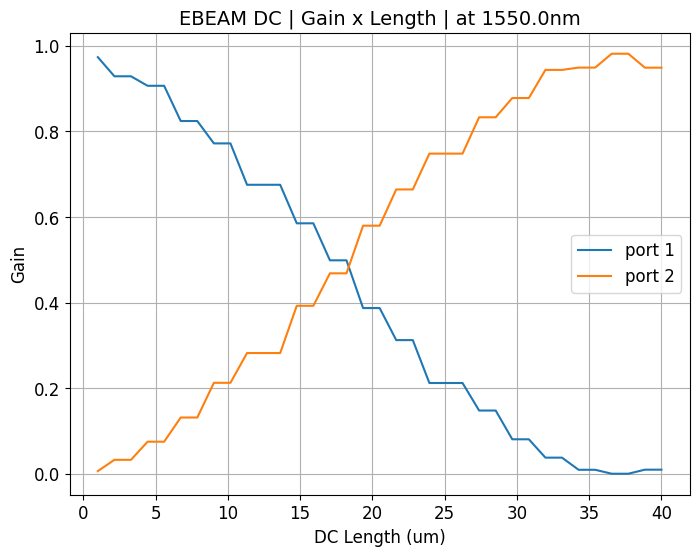

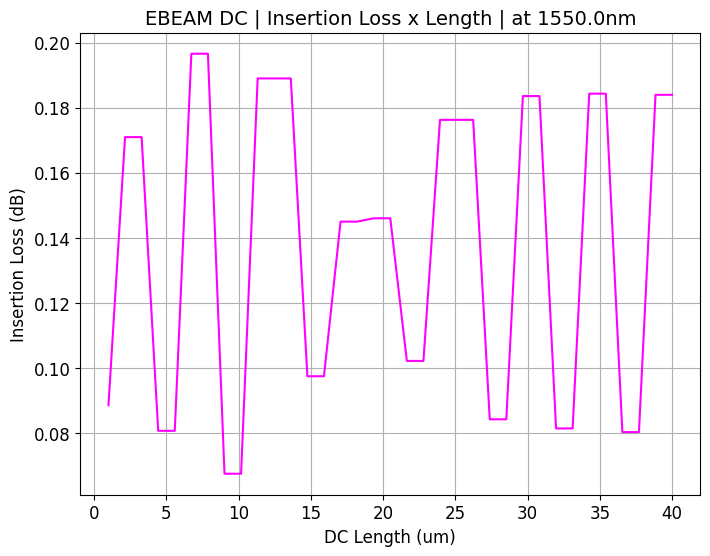

In [37]:
LenArray = np.linspace(1,40,35)*1e-6

Port1Gain = np.zeros(len(LenArray))
Port2Gain = np.zeros(len(LenArray))

for i in range(len(LenArray)):
    inter.switchtolayout()
    inter.setnamed('dc_3','coupling_length',LenArray[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')["'TE' gain (dB)"][500]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')["'TE' gain (dB)"][500]
    WvValue = np.round(1e9*inter.getresult('ONA_1','input 1/mode 1/gain')["wavelength"][480][0],0)

plt.figure(figsize=(8,6))
plt.plot(LenArray*1e6,10**(Port1Gain/10),label='port 1')
plt.plot(LenArray*1e6,10**(Port2Gain/10),label='port 2')
plt.grid()
plt.legend()
plt.title(f'EBEAM DC | Gain x Length | at {WvValue}nm',fontsize=14)
plt.xlabel('DC Length (um)',fontsize=12)
plt.ylabel('Gain',fontsize=12)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"DC Gain x Length " + str(WvValue) + ".png", transparent=False, facecolor="white", bbox_inches="tight")

plt.figure(figsize=(8,6))
plt.plot(LenArray*1e6,0-10*np.log10(10**(Port1Gain/10)+10**(Port2Gain/10)),color='magenta')
plt.grid()
plt.title(f'EBEAM DC | Insertion Loss x Length | at {WvValue}nm',fontsize=14)
plt.xlabel('DC Length (um)',fontsize=12)
plt.ylabel('Insertion Loss (dB)',fontsize=12)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"DC IL x Length " + str(WvValue) + "nm.png", transparent=False, facecolor="white", bbox_inches="tight")

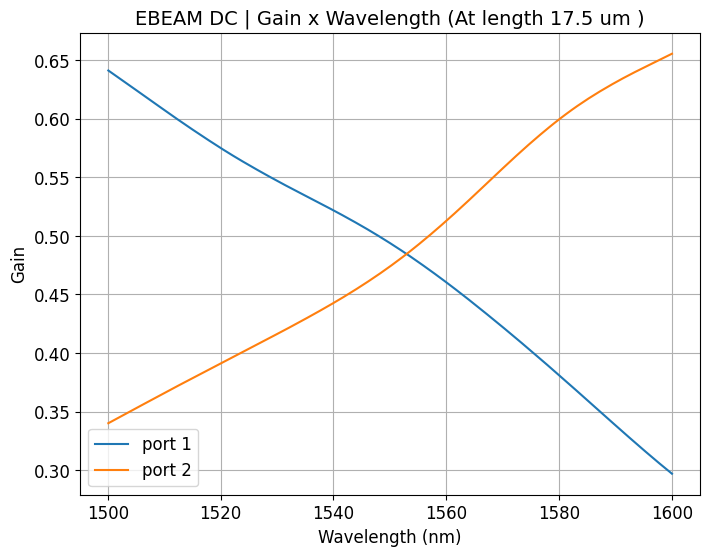

In [38]:
Port1Gain = np.zeros(1000)
Port2Gain = np.zeros(1000)
Port1Band = np.zeros(1000)
Port2Band = np.zeros(1000)

inter.switchtolayout()
inter.setnamed('dc_3','coupling_length',17.5e-6)
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')["'TE' gain (dB)"]
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')["'TE' gain (dB)"]
Port1Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]
Port2Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]

plt.figure(figsize=(8,6))
plt.plot(Port1Band*1e9,10**(Port1Gain/10),label='port 1')
plt.plot(Port2Band*1e9,10**(Port2Gain/10),label='port 2')
plt.grid()
plt.legend()
plt.title('EBEAM DC | Gain x Wavelength (At length 17.5 um )',fontsize=14)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain',fontsize=12)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"DC Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

# Broadband Splitter 50:50 (70.75um)

On SiEPIC Github: https://github.com/SiEPIC/SiEPIC_EBeam_PDK/blob/master/Documentation/Broadband%20Directional%20Coupler/Summary_Broadband_Directional_Coupler.pdf

Reference: http://www.opticsexpress.org/abstract.cfm?URI=oe-23-3-3795

In [29]:
inter.switchtolayout()
inter.delete('ONA_1')
inter.delete('dc_3')
inter.addelement('ebeam_bdc_te1550')
inter.set('x position',0)
inter.set('y position',-1000)
inter.addelement('Optical Network Analyzer')
inter.set('x position',0)
inter.set('y position',-800)
inter.set('number of input ports',2)
inter.set('input parameter','start and stop')
inter.set('start frequency',1535e-9)
inter.set('stop frequency',1560e-9)

inter.connect('ONA_1','output','ebeam_bdc_te1550_1','opt_1')
inter.connect('ONA_1','input 1','ebeam_bdc_te1550_1','opt_3')
inter.connect('ONA_1','input 2','ebeam_bdc_te1550_1','opt_4')

1.0

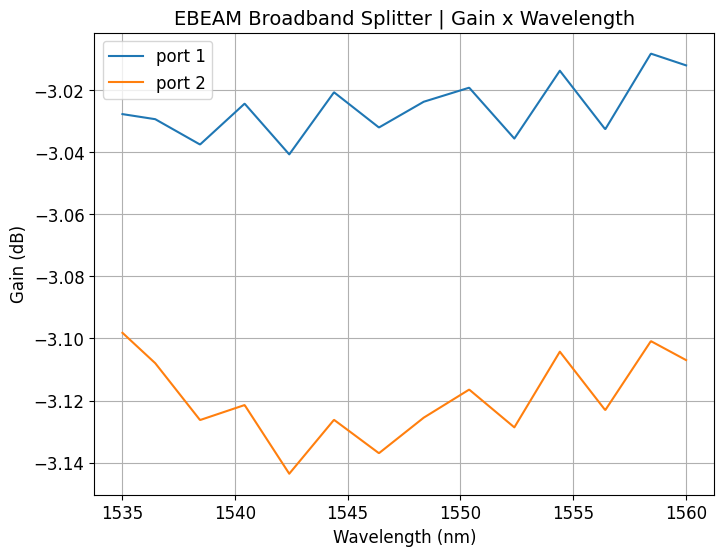

In [33]:
Port1Gain = np.zeros(1000)
Port2Gain = np.zeros(1000)
Port1Band = np.zeros(1000)
Port2Band = np.zeros(1000)

inter.switchtolayout()
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')["'TE' gain (dB)"]
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')["'TE' gain (dB)"]
Port1Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]
Port2Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]

plt.figure(figsize=(8,6))
plt.plot(Port1Band*1e9,Port1Gain,label='port 1')
plt.plot(Port2Band*1e9,Port2Gain,label='port 2')
plt.grid()
plt.legend()
plt.title('EBEAM Broadband Splitter | Gain x Wavelength',fontsize=14)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)

datapath = '../../Media/EBeam_Tests'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Broadband Splitter Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

# 811um MZI Cell using EBeam Components

Text(0, 0.5, 'Gain (dB)')

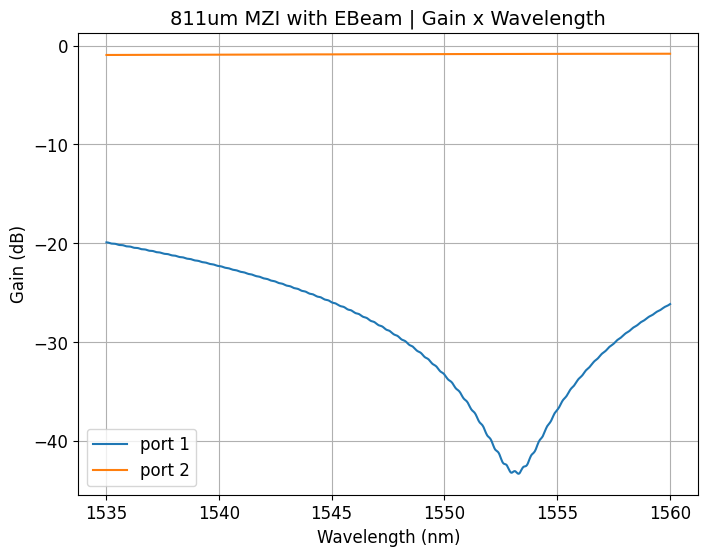

In [35]:
Port1Gain = np.zeros(1000)
Port2Gain = np.zeros(1000)
Port1Band = np.zeros(1000)
Port2Band = np.zeros(1000)

inter.switchtolayout()
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')["'TE' gain (dB)"]
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')["'TE' gain (dB)"]
Port1Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]
Port2Band = inter.getresult('ONA_1','input 2/mode 1/gain')["wavelength"]

plt.figure(figsize=(8,6))
plt.plot(Port1Band*1e9,Port1Gain,label='port 1')
plt.plot(Port2Band*1e9,Port2Gain,label='port 2')
plt.grid()
plt.legend()
plt.title('811um MZI with EBeam | Gain x Wavelength',fontsize=14)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)

# datapath = '../../Media/EBeam_Tests'
# file_count = sum(len(files) for _, _, files in os.walk(datapath))
# plt.savefig(datapath+"/"+"Broadband Splitter Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")